# Phase 4 Notes

## PCA Principal Component Analysis

In [ ]:
from scipy.special import gamma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels as sm
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import mean_squared_error as mse

%matplotlib inline

In [ ]:
packages = pd.read_csv('Phase4_Topic33_PCA/data/packages.csv')
packages.head(3)

In [ ]:
X = packages.drop(columns = ['Shipping Cost ($)'])
y = packages['Shipping Cost ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
scaler = StandardScaler()
X_tr_norm = scaler.fit_transform(X_train)
X_tt_norm = scaler.transform(X_test)

### PCA in `sklearn`

In [ ]:
pca = PCA(n_components=2) # Check out how `n_components` works

X_tr_pca = pca.fit_transform(X_tr_norm)   #x_train fit and transformed by the pca

In [ ]:
pca.explained_variance_ #varience of corr matrix

In [ ]:
sm2 = LinearRegression()
sm2.fit(X_tr_pca, y_train)

In [ ]:
sm2.score(X_tr_pca, y_train)

### Steps for Performing PCA

The theory behind PCA rests upon many foundational concepts of linear algebra. After all, PCA is re-encoding a dataset into an alternative basis (the axes). Here are the exact steps:
1. Recenter each feature of the dataset by subtracting that feature's mean from the feature vector
2. Calculate the covariance matrix for your centered dataset
3. Calculate the eigenvectors of the covariance matrix
    1. You'll further investigate the concept of eigenvectors in the upcoming lesson
4. Project the dataset into the new feature space: Multiply the eigenvectors by the mean-centered features

### Order of modeling
- x train
- standard scale
- pca

### Alternative dimention reduction
- UMAP
- LLE laplacian embedding
- LPP locality preserving projections

## Clustering and K-Means 

### Example

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1)
from sklearn.cluster import KMeans

#### Example 1

In [ ]:
X, y = make_blobs(n_samples = 400, n_features = 2, centers = 6, cluster_std = .8)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=10);

In [ ]:
k_means = KMeans(n_clusters = 6)

k_means.fit(X)

predicted_clusters = k_means.predict(X)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=10);
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=70);

#### Example 2

In [2]:
X_2, y_2 = make_blobs(n_samples=400, n_features=2, centers=np.random.randint(3,8), cluster_std = .8)

With unknown n of clusters/k we create a different version of the model with different k's and make an elbow plot to find the best k

In [3]:
#instantiate and fit `KMeans` with a different value for `n_clusters` between 3 and 7, inclusive.
k_means_3 = KMeans(n_clusters=3).fit(X_2)
k_means_4 = KMeans(n_clusters=4).fit(X_2)
k_means_5 = KMeans(n_clusters=5).fit(X_2)
k_means_6 = KMeans(n_clusters=6).fit(X_2)
k_means_7 = KMeans(n_clusters=7).fit(X_2)

k_list = [k_means_3, k_means_4, k_means_5, k_means_6, k_means_7]

In [4]:
from sklearn.metrics import calinski_harabasz_score

In [10]:
CH_score = []

for model in k_list:
    labels = model.labels_
    score = calinski_harabasz_score(X_2, labels)
    CH_score.append(score)

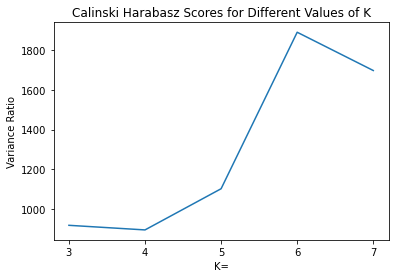

In [11]:
plt.plot([3, 4, 5, 6, 7], CH_score)
plt.xticks([3,4,5,6,7])
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylabel('Variance Ratio')
plt.xlabel('K=')
plt.show()

In [7]:
wcss_score = []

for model in k_list:
    labels = model.labels_
    inertia = model.inertia_
    wcss_score.append(inertia)

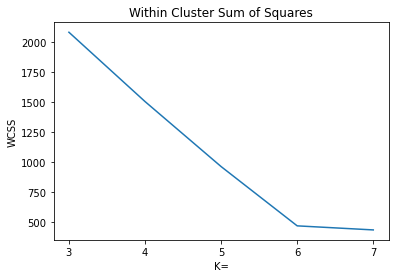

In [8]:
plt.plot([3, 4, 5, 6, 7], wcss_score)
plt.xticks([3,4,5,6,7])
plt.title('Within Cluster Sum of Squares')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.show()

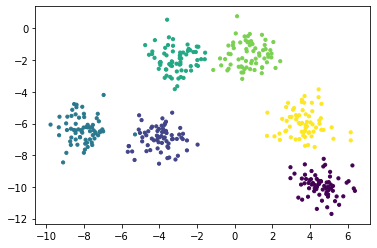

In [9]:
plt.scatter(X_2[:, 0], X_2[:, 1],c=y_2, s=10)